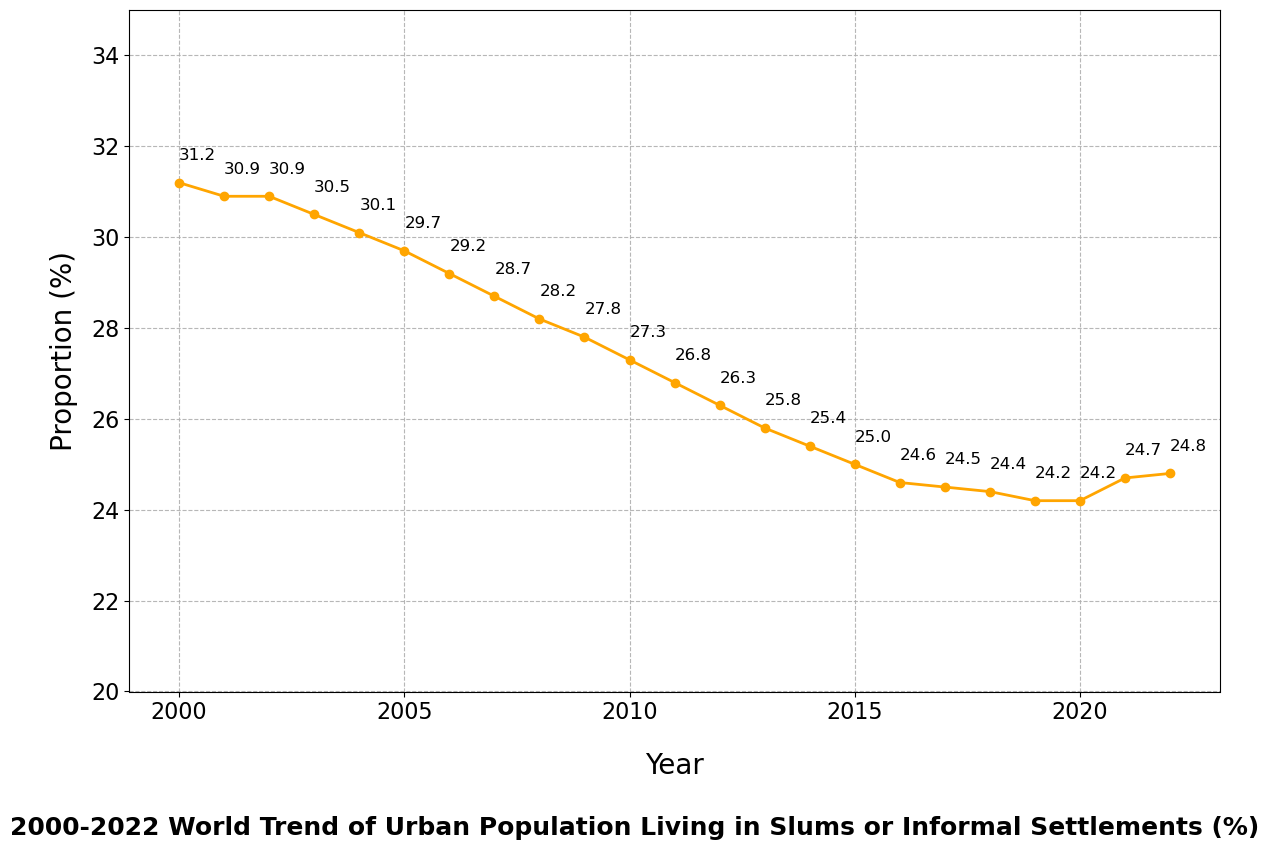

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset and select rows 4035 to 4425
file_path = 'Data/SDG_11-1-1.csv'
data = pd.read_csv(file_path)
trimmed_data2 = data.iloc[4034:4425]

# Filter the data to include only the 'World' region
filtered_data_world = trimmed_data2[trimmed_data2['SDG Region'] == 'World']

# Pivot the data to create a DataFrame with years as the index and proportions as columns
grouped_data_world = filtered_data_world.pivot(index='Data Reference Year', columns='SDG Region', values='Proportion of urban population living in slums or informal settlements (%) (a)')

# Plotting the line chart
plt.figure(figsize=(12, 8))

# Plot the trend for the 'World' region
plt.plot(grouped_data_world.index, grouped_data_world['World'], marker='o', color='orange', linestyle='-', linewidth=2)

# Add labels and title
plt.xlabel('Year', fontsize=20, labelpad=20)
plt.ylabel('Proportion (%)', fontsize=20, labelpad=10)

# Set y-axis range from 0 to 50
plt.ylim(20, 35)
plt.grid(True, linestyle='--', alpha=0.9)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Add data labels with one decimal place
for x, y in zip(grouped_data_world.index, grouped_data_world['World']):
    plt.text(x, y + 0.5, f'{y:.1f}', color='black', fontsize=12)

# Adding the title at the bottom
plt.figtext(0.5, -0.05, '2000-2022 World Trend of Urban Population Living in Slums or Informal Settlements (%)', 
            ha='center', fontsize=18, fontweight='bold')

# Adjust layout for better fit
plt.tight_layout()

# Display the plot
plt.show()


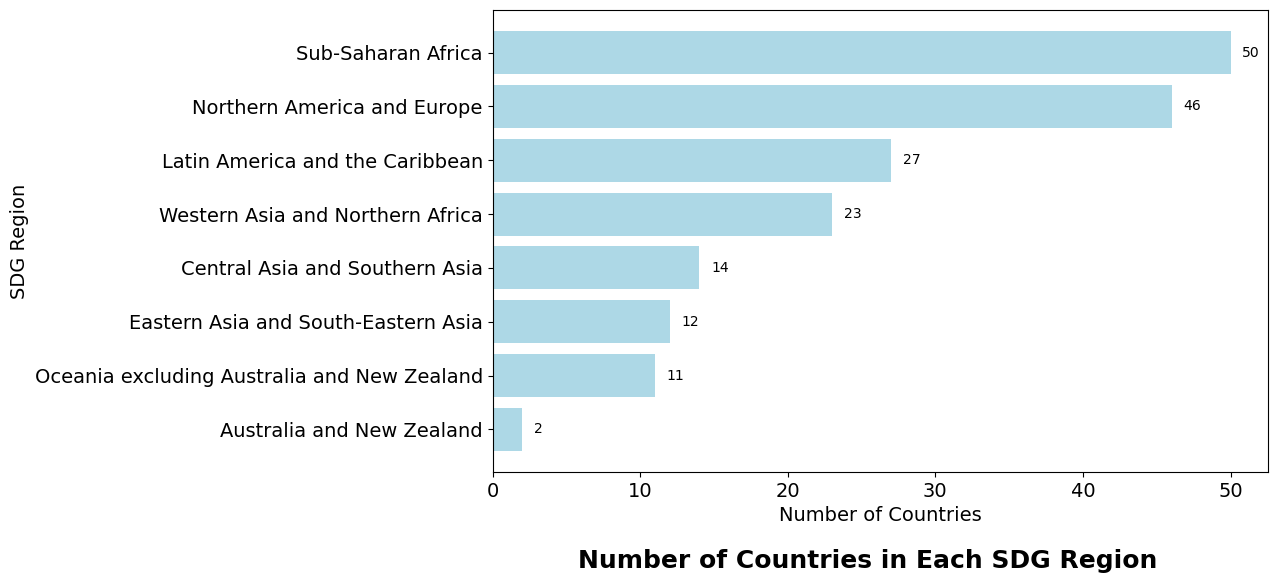

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Select the first 4034 rows
trimmed_data = data.head(4034)

# Calculate the number of unique countries/territories in each SDG region using the correct column
region_country_table = trimmed_data.groupby('SDG Region')['Country or Territory Name.1'].nunique().reset_index(name='Number of Countries/Territories')

# Sort the data by the number of countries/territories in ascending order
region_country_table = region_country_table.sort_values('Number of Countries/Territories', ascending=True)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(region_country_table['SDG Region'], region_country_table['Number of Countries/Territories'], color='lightblue')

# Add the number of countries/territories on the side of each bar
for bar in bars:
    plt.text(bar.get_width() + 0.8, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width()}', va='center', ha='left')

plt.xlabel('Number of Countries', fontsize=14)
plt.ylabel('SDG Region', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Adding the title at the bottom
plt.figtext(0.5, -0.05, 'Number of Countries in Each SDG Region', 
            ha='center', fontsize=18, fontweight='bold')

# Show the plot
plt.show()


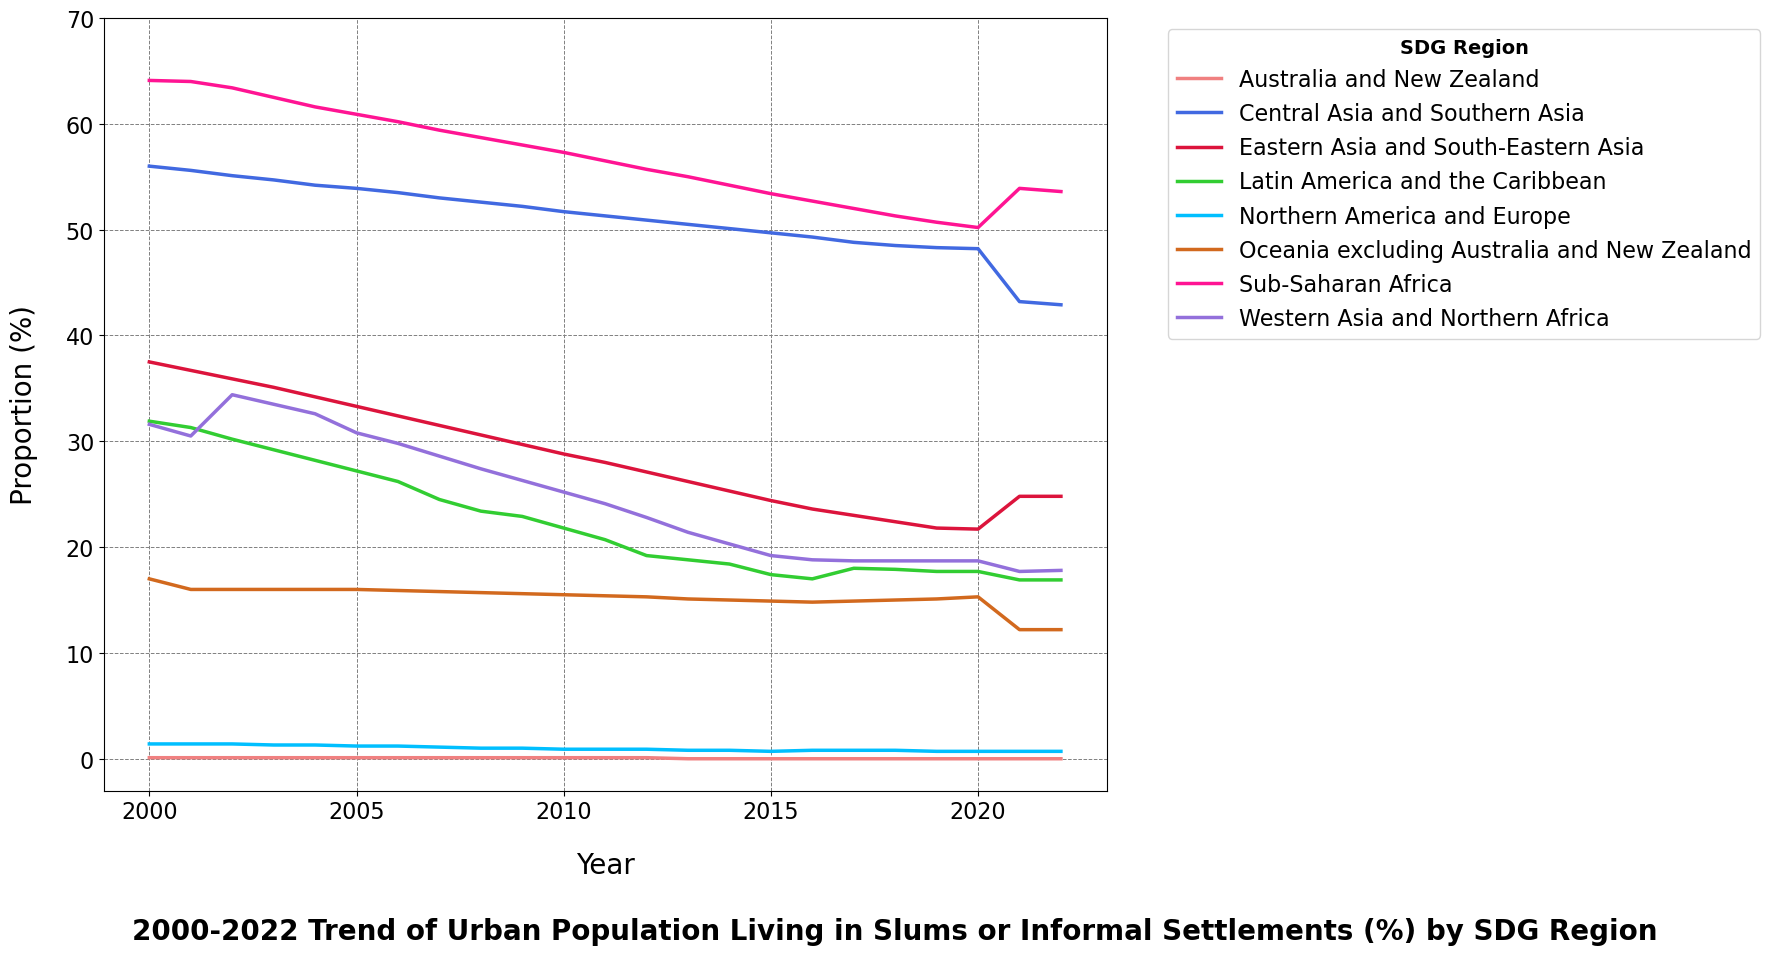

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager

# Load the dataset and select rows 4035 to 4425
trimmed_data2 = data.iloc[4034:4425]

# Define custom colors for each region
custom_colors = {
    'Australia and New Zealand': 'lightcoral',
    'Central Asia and Southern Asia': 'royalblue',
    'Eastern Asia and South-Eastern Asia': 'crimson',
    'Latin America and the Caribbean': 'limegreen',
    'Northern America and Europe': 'deepskyblue',
    'Oceania excluding Australia and New Zealand': 'chocolate',
    'Sub-Saharan Africa': 'deeppink',
    'Western Asia and Northern Africa': 'mediumpurple'
}

# Filter the data to include only the specified regions
filtered_data = trimmed_data2[trimmed_data2['SDG Region'].isin(custom_colors.keys())]

# Group the data by SDG Region and Year, and apply interpolation to fill gaps
grouped_data = filtered_data.pivot(index='SDG Region', columns='Data Reference Year', values='Proportion of urban population living in slums or informal settlements (%) (a)')
grouped_data = grouped_data.interpolate(method='linear', axis=1)  # Apply interpolation

# Plotting the trend with custom colors
plt.figure(figsize=(18, 9))
for region, color in custom_colors.items():
    if region in grouped_data.index:
        plt.plot(grouped_data.columns, grouped_data.loc[region], linestyle='-', color=color, label=region, linewidth=2.5)

# Labeling the axes
plt.xlabel('Year', fontsize=20, labelpad=20)
plt.ylabel('Proportion (%)', fontsize=20, labelpad=20)

# Set the y-axis limit from -3 to 70
plt.ylim(-3, 70)

# Customize ticks
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Adjusting the legend
plt.legend(
    title='SDG Region',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=16,
    title_fontproperties=font_manager.FontProperties(weight='bold', size=14)
)

# Adding grid
plt.grid(True, linestyle='--', color='gray', linewidth=0.7)

# Improve layout
plt.tight_layout()

# Adding the title at the bottom
plt.figtext(0.5, -0.05, '2000-2022 Trend of Urban Population Living in Slums or Informal Settlements (%) by SDG Region', 
            ha='center', fontsize=20, fontweight='bold')

# Display the plot
plt.show()


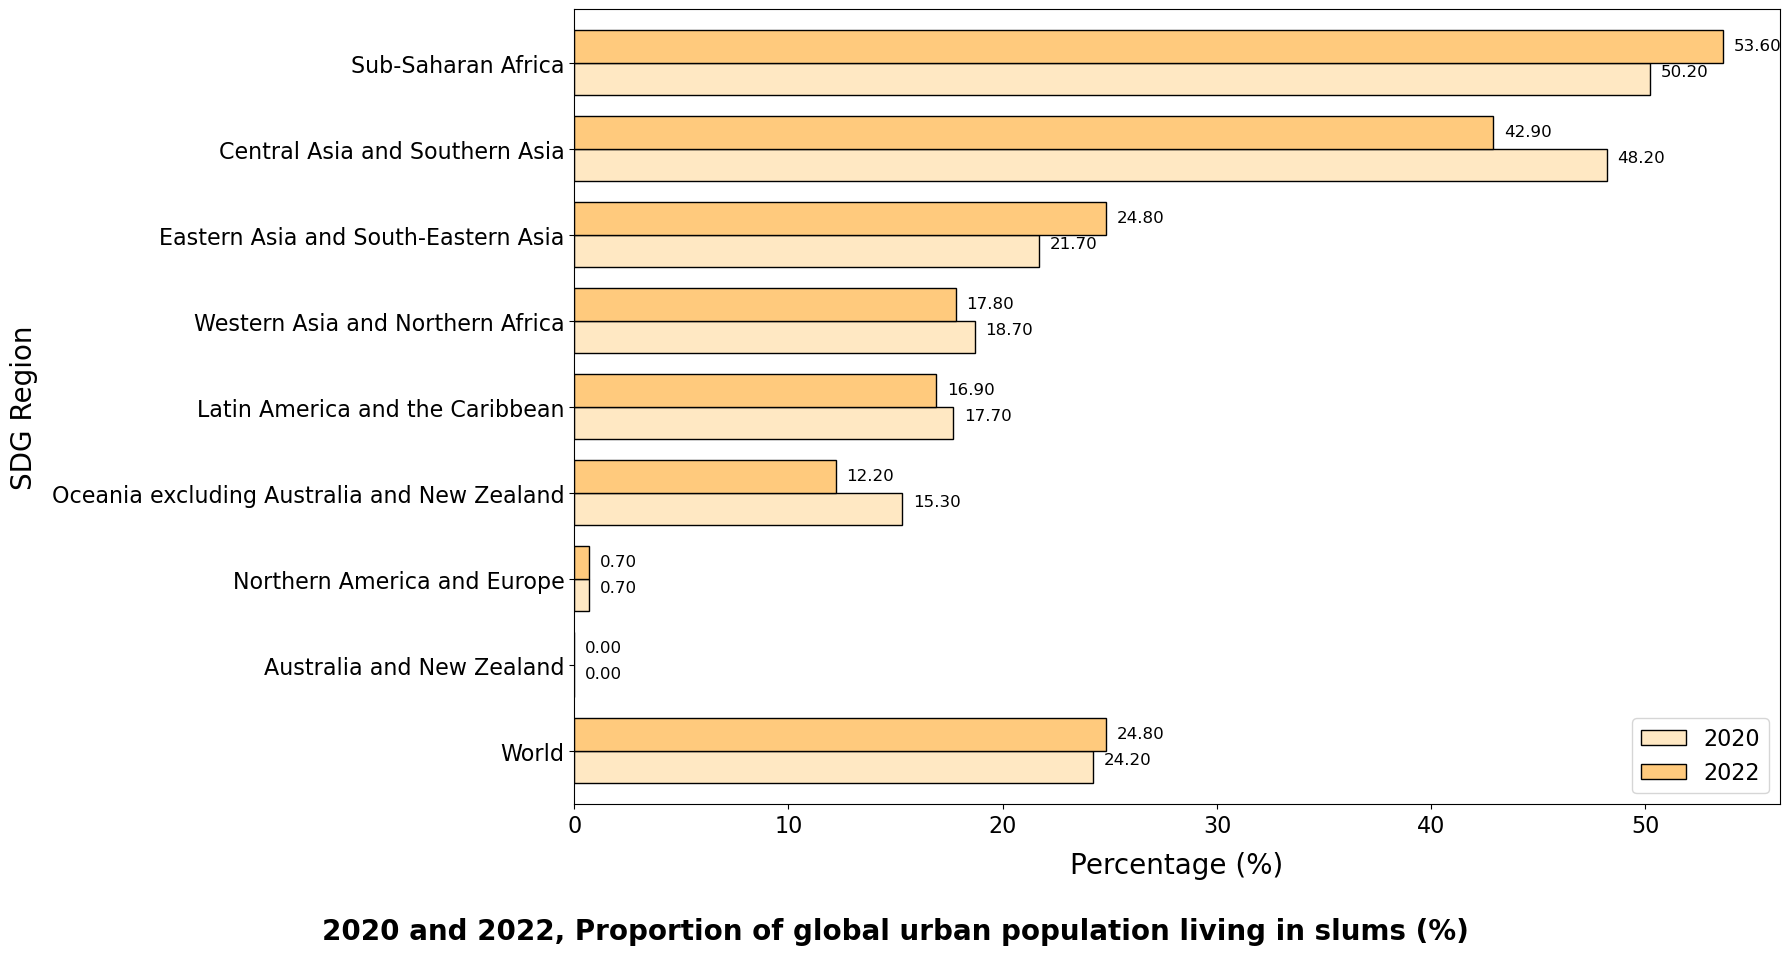

In [8]:
# Filter the relevant columns
filtered_data = trimmed_data2[['SDG Region', 'Proportion of urban population living in slums or informal settlements (%) (a)', 'Data Reference Year']]

# Define the regions to keep, in the desired order
regions_to_keep = [
    'Sub-Saharan Africa',
    'Central Asia and Southern Asia',
    'Eastern Asia and South-Eastern Asia',
    'Western Asia and Northern Africa',
    'Latin America and the Caribbean',
    'Oceania excluding Australia and New Zealand',
    'Northern America and Europe',
    'Australia and New Zealand',
    'World'
]

# Filter to include only the specified regions
filtered_data = filtered_data[filtered_data['SDG Region'].isin(regions_to_keep)]

# Filter for years 2020 and 2022
filtered_data_2020_2022 = filtered_data[filtered_data['Data Reference Year'].isin([2020, 2022])]

# Group by SDG Region and Year, then calculate the mean proportion
grouped_data = filtered_data_2020_2022.groupby(['SDG Region', 'Data Reference Year'])['Proportion of urban population living in slums or informal settlements (%) (a)'].mean().unstack()

# Reindex the grouped data to match the desired order, reversing the order to ensure it appears correctly
grouped_data = grouped_data.reindex(regions_to_keep[::-1])

# Define custom colors for the bars (2020 on top, 2022 on the bottom)
custom_colors = ['#FFE8C3', '#FFCA7D']  # Light color for 2020 on top, darker color for 2022 below

# Plotting the bar chart
plt.figure(figsize=(18, 9))

# Plotting the data with the correct color order and width
grouped_data.plot(kind='barh', ax=plt.gca(), color=custom_colors, edgecolor='black', width=0.75)

# Adding labels
plt.xlabel('Percentage (%)', fontsize=20, labelpad=10)
plt.ylabel('SDG Region', fontsize=20, labelpad=10)
plt.legend(['2020', '2022'], loc='lower right', fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Adding data labels with two decimal places (2020 on top and 2022 on bottom for each region)
for index, value in enumerate(grouped_data[2020]):
    plt.text(value + 0.5, index - 0.15, f'{value:.2f}', color='black', fontsize=12)
for index, value in enumerate(grouped_data[2022]):
    plt.text(value + 0.5, index + 0.15, f'{value:.2f}', color='black', fontsize=12)

# Adding the title at the bottom
plt.figtext(0.5, -0.05, '2020 and 2022, Proportion of global urban population living in slums (%)', 
            ha='center', fontsize=20, fontweight='bold')

# Adjust layout for better fit
plt.tight_layout()

# Display the plot
plt.show()



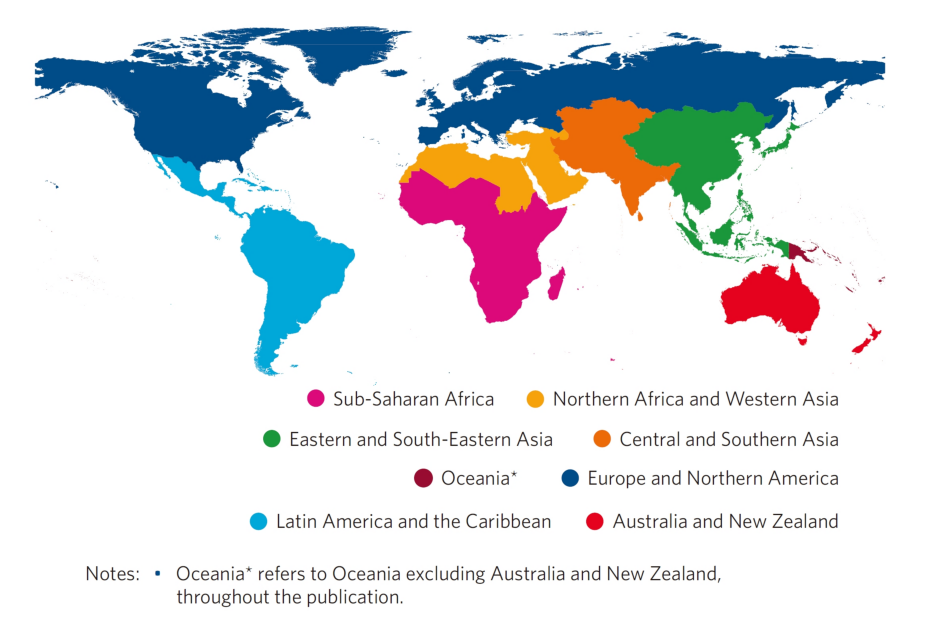

In [9]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

# Load the image
image = Image.open('UN2024.png')

# Create a drawing context
draw = ImageDraw.Draw(image)

# Define font and size (adjust the font path if necessary)
try:
    font = ImageFont.truetype("arial.ttf", 40)  # Increased font size for better visibility
except IOError:
    font = ImageFont.load_default()

# Define the positions and counts based on the regions
positions = {
    'Sub-Saharan Africa': ((600, 480), '50'),
    'Northern Africa and Western Asia': ((640, 360), '23'),
    'Eastern and South-Eastern Asia': ((900, 390), '12'),
    'Central and Southern Asia': ((800, 350), '14'),
    'Oceania*': ((1100, 600), '11'),
    'Europe and Northern America': ((300, 150), '46'),
    'Latin America and the Caribbean': ((280, 450), '27'),
    'Australia and New Zealand': ((1170, 680), '2')
}

# Overlay the counts on the image with white color for better visibility
for region, (position, count) in positions.items():
    draw.text(position, count, fill="white", font=font)

# Display the image using matplotlib
plt.figure(figsize=(12, 10))
plt.imshow(image)
plt.axis('off')  # No axes for this plot
plt.show()


In [ ]:
pip install geopandas matplotlib

/tmp/ipykernel_24480/520371848.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


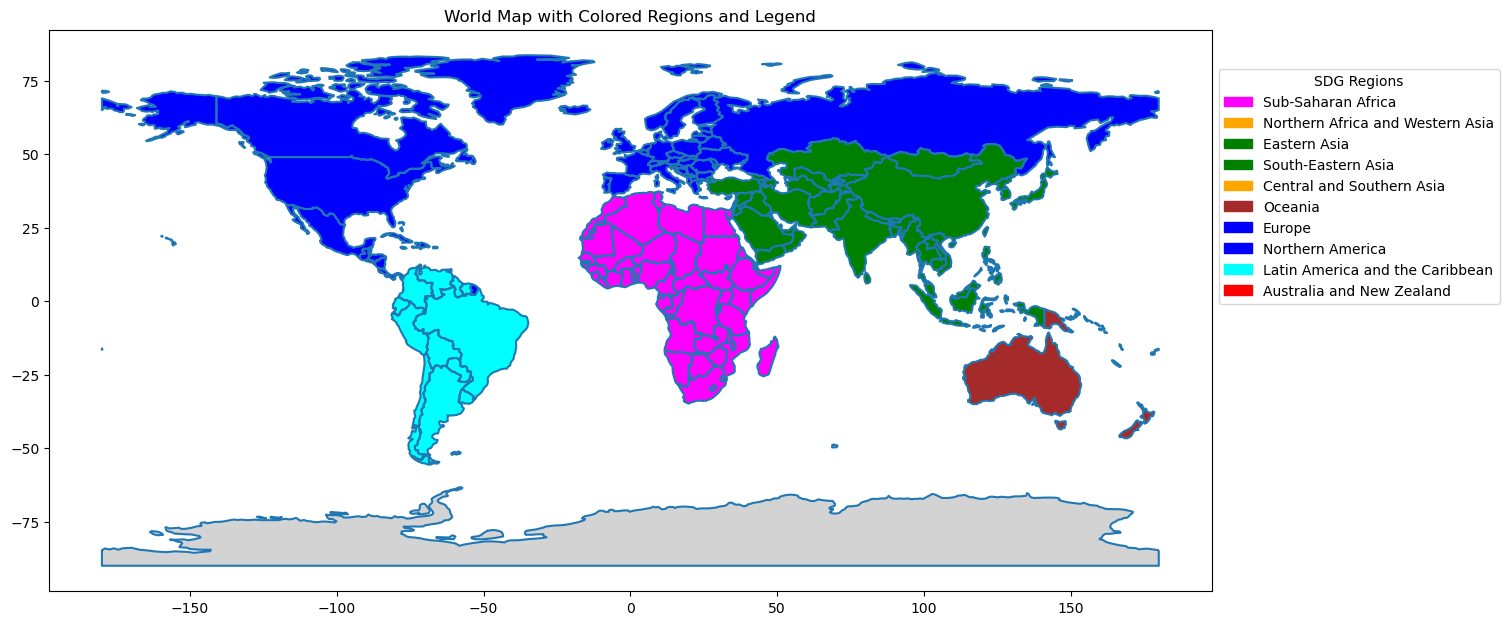

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Define a mapping from regions to colors
region_colors = {
    'Sub-Saharan Africa': 'magenta',
    'Northern Africa and Western Asia': 'orange',
    'Eastern Asia': 'green',
    'South-Eastern Asia': 'green',
    'Central and Southern Asia': 'orange',
    'Oceania': 'brown',
    'Europe': 'blue',
    'Northern America': 'blue',
    'Latin America and the Caribbean': 'cyan',
    'Australia and New Zealand': 'red'
}

# Manually assign regions to each country (adjust based on your specific regions)
world['region'] = world['continent'].map({
    'Africa': 'Sub-Saharan Africa',
    'Asia': 'Eastern Asia',  # Adjust based on sub-regions
    'Europe': 'Europe',
    'Oceania': 'Oceania',
    'North America': 'Northern America',
    'South America': 'Latin America and the Caribbean'
})

# Replace NaN values with a default region
world['region'] = world['region'].fillna('Other')

# Assign colors based on regions
world['color'] = world['region'].map(region_colors).fillna('lightgrey')  # Default color for 'Other'

# Plot the map with colors
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(ax=ax, color=world['color'])

# Create custom legend
handles = [mpatches.Patch(color=color, label=region) for region, color in region_colors.items()]
plt.legend(handles=handles, title="SDG Regions", loc='lower left', bbox_to_anchor=(1, 0.5))

plt.title('World Map with Colored Regions and Legend')
plt.show()
